In [98]:
from ctgan import CTGANSynthesizer
from ctgan import load_demo
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline
import pandas as pd
from sdv.tabular import CTGAN
from sdv.tabular import TVAE
import seaborn as sns
from matplotlib import cm
import math

In [9]:
import sys
sys.path

['C:\\Users\\saha0073\\Research\\gan',
 'C:\\Users\\saha0073\\Anaconda3\\python38.zip',
 'C:\\Users\\saha0073\\Anaconda3\\DLLs',
 'C:\\Users\\saha0073\\Anaconda3\\lib',
 'C:\\Users\\saha0073\\Anaconda3',
 '',
 'C:\\Users\\saha0073\\Anaconda3\\lib\\site-packages',
 'C:\\Users\\saha0073\\Anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg',
 'C:\\Users\\saha0073\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\Users\\saha0073\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\Users\\saha0073\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\Users\\saha0073\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\saha0073\\.ipython']

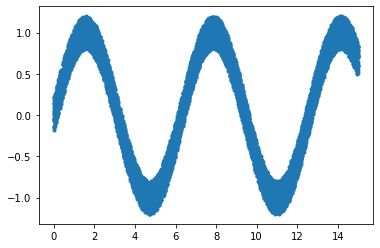

In [12]:
N=10000
x=np.linspace(0.0, 15.0, num=N)
y=np.sin(x)
yadd=np.zeros(shape=(N))
for i in range (0,N):
    yadd[i]=random.uniform(-1,1)

ynew=y+yadd/5
xy=np.zeros(shape=(N,2))
xy[:,0]=x
xy[:,1]=ynew
dfxy=pd.DataFrame(xy,columns=['x','y'])
plt.plot(dfxy['x'],dfxy['y'],'.')

In [13]:

#ctgan = CTGAN()
#ctgan.fit(dfxy)

tvae = TVAE()
tvae.fit(dfxy)

genN=10000
# Synthetic copy
#sampgan = ctgan.sample(genN)
sampvae=tvae.sample(genN)

C:\Users\saha0073\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\saha0073\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn('Initialization %d did not converge. '
C:\Users\saha0073\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\saha0073\Anaconda3\lib\site-packages\sklearn\mixture\_base.py:265: ConvergenceWarning: Initialization 1 did not converge. Try di

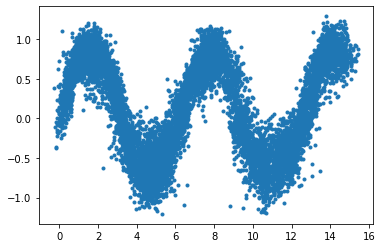

In [14]:
#plt.plot(sampgan['x'],sampgan['y'],'.')
plt.plot(sampvae['x'],sampvae['y'],'.')

<AxesSubplot:xlabel='x', ylabel='y'>

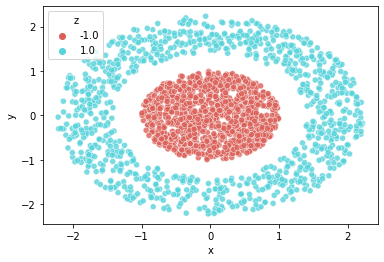

In [102]:
N=1000
np.random.seed(1) # For reproducibility
r1 = np.sqrt(np.random.rand(N, 1)) # Radius
t1 = 2*np.pi*np.random.rand(N, 1) # Angle
data1 = np.hstack((r1*np.cos(t1), r1*np.sin(t1))) # Points
np.random.seed(2) # For reproducibility
r2 = np.sqrt(3*np.random.rand(N, 1)+2) # Radius
t2 = 2*np.pi*np.random.rand(N, 1) # Angle
data2 = np.hstack((r2*np.cos(t2), r2*np.sin(t2))) # Points

data3 = np.vstack((data1, data2))
labels = np.ones((2*N, 1))
labels[0:N, :] = -1

'''
plt.scatter(data3[np.where(labels==1)[0],0],
data3[np.where(labels==1)[0],1], c='r')
plt.scatter(data3[np.where(labels==-1)[0],0],
data3[np.where(labels==-1)[0],1], c='b')
'''

dfxyz=pd.DataFrame(data3,columns=['x','y'])
dfxyz['z']=labels
#plt.plot(dfxy['x'],dfxy['y'],'.')
sns.scatterplot(
    x='x', y='y',
    hue='z',
    palette=sns.color_palette("hls", 2),
    data=dfxyz,
    #data=df_sub,
    legend="full",
    alpha=0.8
)

In [119]:
#ctgan = CTGAN()
#ctgan.fit(dfxyz)

#tvaez = TVAE()
#tvaez.fit(dfxyz)

genN=10000
# Synthetic copy
sampganz = ctgan.sample(genN)
sampganz['z']=round(sampganz['z'])
sampvaez=tvaez.sample(genN)
sampvaez['z']=round(sampvaez['z'])

<AxesSubplot:xlabel='x', ylabel='y'>

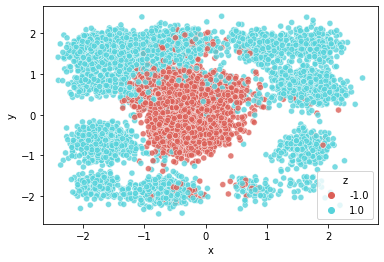

In [120]:
sns.scatterplot(
    x='x', y='y',
    hue='z',
    palette=sns.color_palette("hls", 2),
    data=sampvaez,
    #data=sampganz,
    legend="full",
    alpha=0.8
)

In [98]:
print(*round(sampvaez['z']))

-1.0 1.0 -1.0 -1.0 1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 -1.0 1.0 -1.0 1.0 -1.0 -1.0 1.0 -1.0 1.0 -1.0 -1.0 -1.0 -1.0 1.0 1.0 -1.0 -1.0 1.0 -1.0 -1.0 -1.0 1.0 -1.0 1.0 1.0 1.0 1.0 -1.0 -1.0 1.0 -1.0 1.0 1.0 -1.0 -1.0 -1.0 1.0 1.0 -1.0 -1.0 -1.0 1.0 1.0 -1.0 1.0 -1.0 -1.0 -1.0 -1.0 1.0 -1.0 1.0 1.0 -1.0 -1.0 1.0 1.0 1.0 -1.0 1.0 1.0 1.0 1.0 -1.0 -1.0 -1.0 1.0 1.0 1.0 1.0 1.0 1.0 -1.0 1.0 -1.0 1.0 1.0 1.0 -1.0 -1.0 1.0 -1.0 -1.0 -1.0 1.0 -1.0 1.0


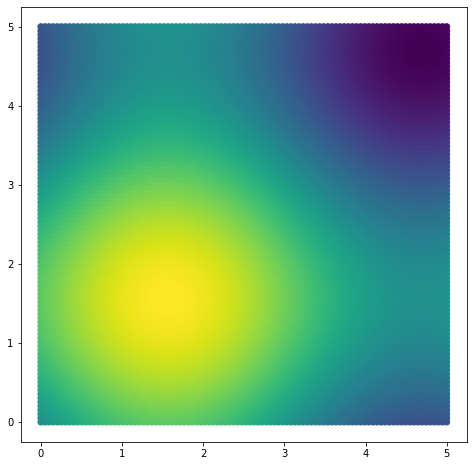

In [104]:
N=100
x=np.linspace(0.0, 5.0, num=N)
y=np.linspace(0.0, 5.0, num=N)
x,y=np.meshgrid(x,y)

z=np.sin(x)+np.sin(y)
#z=np.exp(x)+np.exp(y)

zadd=np.zeros(shape=(N,N))
for i in range (0,N):
    for j in range(0,N):
        zadd[i,j]=random.uniform(-1,1)

znew=z+0*zadd/5

x=x.flatten()
y=y.flatten()
znew=znew.flatten()

xyz=np.zeros(shape=(N*N,3))
xyz[:,0]=x
xyz[:,1]=y
xyz[:,2]=znew
dfxyz=pd.DataFrame(xyz,columns=['x','y','z'])

#plt.plot(dfxy['x'],dfxy['y'],'.')
#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#surf = ax.plot_surface(x,y, znew, cmap=cm.coolwarm,
                       #linewidth=0, antialiased=False)
#ax=plt.axes(projection='3d')
#ax.plot3D(dfxy['x'],dfxy['y'],dfxy['z'],'.')

#plot=plt.pcolormesh(x,y,znew,cmap='RdBu',shading='flat')

#%matplotlib notebook
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dfxy['x'], dfxy['y'], dfxy['z'], marker='.',cmap='RdBu')
#plt.show()

plt.figure(figsize=(8,8))
plt.scatter(dfxyz['x'],dfxyz['y'],c=dfxyz['z'])
plt.show()

In [105]:
dfxyz.sample(frac=.1)

,x,y,z
180,4.040404,0.050505,-0.732104
738,1.919192,0.353535,1.286138
4775,3.787879,2.373737,0.092368
8000,0.000000,4.040404,-0.782588
6299,5.000000,3.131313,-0.948645
...,...,...,...
7599,5.000000,3.787879,-1.561150
3133,1.666667,1.565657,1.995395
609,0.454545,0.303030,0.737468
1474,3.737374,0.707071,0.088454


In [108]:
#tvaez = TVAE()
#tvaez.fit(dfxyz)


#ctganz = CTGAN()
#ctganz.fit(dfxyz)

genN=100000
# Synthetic copy
#sampganz = ctganz.sample(genN)
#sampganz['z']=round(sampganz['z'])
sampvaez=tvaez.sample(genN)
#sampvaez['z']=round(sampvaez['z'])

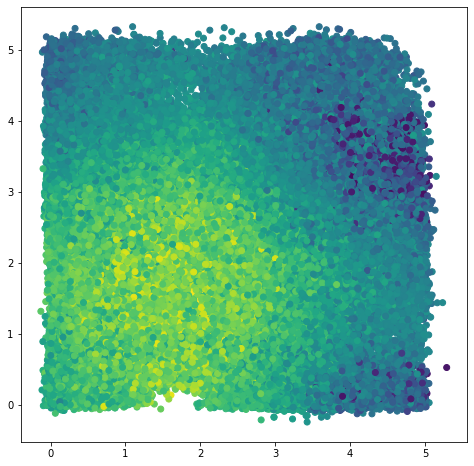

In [109]:
plt.figure(figsize=(8,8))
plt.scatter(sampvaez['x'],sampvaez['y'],c=sampvaez['z'])

<IPython.core.display.Javascript object>


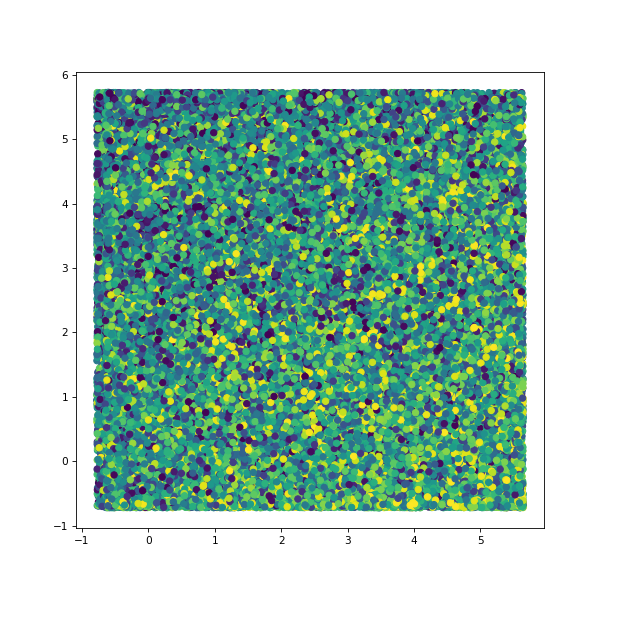

In [78]:
plt.figure(figsize=(8,8))
plt.scatter(sampganz['x'],sampganz['y'],c=sampganz['z'])

<IPython.core.display.Javascript object>


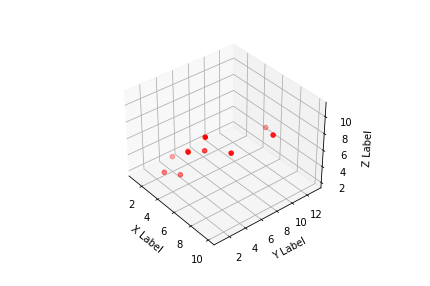

In [55]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x =[1,2,3,4,5,6,7,8,9,10]
y =[5,6,2,3,13,4,1,2,4,8]
z =[2,3,3,3,5,7,9,11,9,10]

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [35]:
x
y
znew.shape
#znew

(25,)

<AxesSubplot:xlabel='x', ylabel='y'>

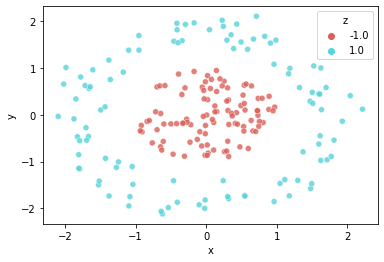

In [85]:
#data3
#labels

#xy=np.zeros(shape=(N,2))
#xy[:,0]=x
#xy[:,1]=ynew
dfxyz=pd.DataFrame(data3,columns=['x','y'])
dfxyz['z']=labels
#plt.plot(dfxy['x'],dfxy['y'],'.')
sns.scatterplot(
    x='x', y='y',
    hue='z',
    palette=sns.color_palette("hls", 2),
    data=dfxyz,
    #data=df_sub,
    legend="full",
    alpha=0.8
)

In [82]:
dfxyz.head()

,x,y,z
0,-0.299106,0.572327,-1.0
1,-0.836483,-0.143598,-1.0
2,0.008064,-0.007025,-1.0
3,-0.343167,0.429615,-1.0
4,0.321548,-0.208237,-1.0


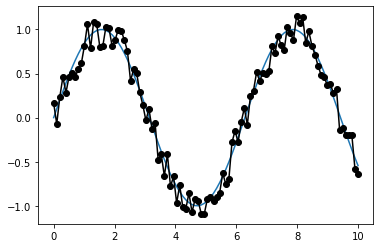

In [17]:
plt.plot(x,y)
plt.plot(x,y+(yadd/5), 'ko-')

In [23]:
ynew=y+yadd/5
N=100
xy=np.zeros(shape=(N,2))
xy[:,0]=x
xy[:,1]=y
dfxy=pd.DataFrame(xy,columns=['x','y'])

In [22]:
df.head()

,x,y
0,0.00000,0.000000
1,0.10101,0.100838
2,0.20202,0.200649
3,0.30303,0.298414
4,0.40404,0.393137


In [26]:
samples.head()

,x,y
0,-2.260608,-0.628487
1,1.694409,0.564192
2,-2.144110,-0.952020
3,-1.123962,-0.501252
4,2.245690,-0.725187


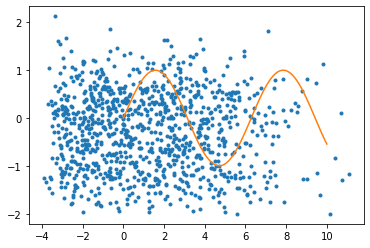

In [29]:
plt.plot(samples['x'],samples['y'],'.')
plt.plot(dfxy['x'],dfxy['y'])

In [ ]:
np.linspace(2.0, 3.0, num=5)

In [1]:
a=5

In [2]:
b=a+5

In [3]:
b

10